# Invatigate sequence-structure alignment scores (expacted alignment scores) of random sequences
### This notebook investigates the locarna scores and its distriburtion. In local alignment statistics two basic assumption for the scoring system are made: (1) expacted score should be negativ (2) at least one score is positiv. The first assumption is fundametal for not wrongly rewording longer alignments. If the score of two positiv sequences would also be (expated) positiv longer alignments would be preferd even the aligned parts are not bologicaly meaningfull. 
### By considering also a structure score in a scoring system of a alignment positive scores even between not bologically not meaningfull sequences could accure. Small structural elements occure quite fequently also in random sequences, which would lead to a positiv score contribution for random sequences.
### LocARNA score:

In [1]:
from IPython.display import display, Math, Latex
display(Math( '\sum_{(ij;kl)\in S} s.w. \Psi_{ij}^{A} \Psi_{kl}^{B} + \sum_{(ij;kl)\in S} t.f. (\sigma(A_{i}, B_{k}) + \sigma(A_{j}, B_{l}) )+ \sum_{(i,k)\in A_{s}} \sigma(A_{i}, B_{k}) - N_{gap} \gamma - N_{gap}^{o} \\beta'))

<IPython.core.display.Math object>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Functions

In [3]:
# read Bralibase input that contains several runs of one parameter that was alternated
def read_file_to_df(infile):
    
    #flags:
    set_paramerter = 0
    read_file = 0
    flag_header = 1

    sw_parameter = ''
    df_dict ={}


    f = open(infile, 'r') # open the file for reading
    data = []
    for row_num, line in enumerate(f):
        # Remove the new line at the end and then split the string based on
        # tabs. This creates a python list of the values.
        values = line.strip().split('\t')
        # print values

        if flag_header == 1:
            header = values
            flag_header = 0
            continue
        else: 
            value_line = values



    f.close() # close the file
    
    return df_dict

In [4]:
def select_parts_of_df(df_in, identifier):
    df = pd.concat([df_in['mlocarnaCall'], df_in['APSI'], df_in['locarnascore'], df_in['sum_seq_length'], df_in['structureWeight'], df_in['SPS'], df_in['name']], axis=1, keys=['mlocarnaCall', 'APSI', 'locarnascore', 'sum_seq_length', 'structureWeight', 'SPS', 'name'])
    df['seq'] = identifier
    return df



def generate_one_df(df, df_shuffled, id_df='ncRNA', id_df_shuffled='shuffled_RNA'):
    
    df_allseq_unshuffled = select_parts_of_df(df, id_df)
    df_allseq_shuffled = select_parts_of_df(df_shuffled, id_df_shuffled)
    
    frames = [df_allseq_shuffled, df_allseq_unshuffled]
    df_shuffled_and_unshuffled = pd.concat(frames)
    
    return df_shuffled_and_unshuffled

In [5]:
# Cast values:
def convert_str_in_df(df, param, col_typ='int'):
    #df_colum.astype(col_typ)
    # print col_typ
    #df_globale_sw['APSI'] = df_globale_sw['APSI'].astype('int')
    df[param] = df[param].astype(col_typ)
    # df.info()
    #df_colum = df_colum.astype(col_typ)
    #print 'chaged '
    return df

In [6]:
def read_data(file_path):
    df_globale_sw_raw = pd.read_table(file_path, sep='\t')
    
    # delet from all lines inbetween 
    df_globale_sw = df_globale_sw_raw.drop(df_globale_sw_raw[df_globale_sw_raw['SPS'] == 'SPS'].index)
    
    #df_globale_sw.info()
    
    
    df_globale_sw = convert_str_in_df(df_globale_sw, 'APSI', 'int')
    df_globale_sw = convert_str_in_df(df_globale_sw, 'SPS', 'float')
    df_globale_sw = convert_str_in_df(df_globale_sw, 'locarnascore', 'float')
    df_globale_sw = convert_str_in_df(df_globale_sw, 'sum_seq_length', 'float')
    df_globale_sw = convert_str_in_df(df_globale_sw, 'structureWeight', 'int')
    df_globale_sw = convert_str_in_df(df_globale_sw, 'name', 'str')

    
    # df_globale_sw.info()
    
    return df_globale_sw


In [7]:
def length_diff_subset_df(df, start, end):
    df_subset = length_distibution_df[(length_distibution_df['length_diff'] >= start) & (length_distibution_df['length_diff'] < end)]
    df_grouped = df_subset.groupby(['length_diff']).size().reset_index(name='counts')
    return df_grouped
    

## Information about the Data
### The Dataset of this are the Bralibase k2 fasta alignment files. For the locarna call LocARNA version 2.0._R6  was used. LocaRNA was called in the global mode to allow the score to also take negativ values. The first dataset is k2 Bralibase is constructed by denucleodide shuffeling of the sequences contained. This sequences where shuffled by the fasta-shuffle-letters tool of the meme suite. The second dataset are artifical dataset of sequence length 100 and a equal nucleotide distribution. 



## Load data

In [8]:
# artifical datasets:
in_file_artifical_seq_sw_0_400 = '/home/muellert/Dokumente/locarna_parameteropt/Data/20180919_global_SW_0_400_step_50_artifical/20180918_artifical_SW_0_400_step_50_seq_struc.log'
in_file_artifical_seq_seq_only_sw_0_400 = '/home/muellert/Dokumente/locarna_parameteropt/Data/20180919_global_SW_0_400_step_50_artifical/20180918_artifical_SW_0_400_step_50_seq_only.log'


In [9]:
# 'new' bralibase with SW 0 - 400
in_file_shuffled_sw0_400struc_off = '/home/muellert/Dokumente/locarna_parameteropt/Data/20181017_global_k2_SW_0_400/20181016_global_shuffledk2_SW_0_400_p1.log'
in_file_shuffled_sw0_400 = '/home/muellert/Dokumente/locarna_parameteropt/Data/20181017_global_k2_SW_0_400/20181016_global_shuffledk2_SW_0_400_p0_0005.log'
in_file_ncRNA__sw0_400 = '/home/muellert/Dokumente/locarna_parameteropt/Data/20181017_global_k2_SW_0_400/20181017_global_k2_SW_0_400_p0_0005_new_run.log'

## Construct dataframes

In [10]:
df_globale_ncRNA_sw0_400 = read_data(in_file_ncRNA__sw0_400)
df_globale_shuffled_sw0_400 = read_data(in_file_shuffled_sw0_400)
df_globale_shuffled_struc_off_sw0_400 = read_data(in_file_shuffled_sw0_400struc_off)

df_allseq_ncRNA_sw0_400 = select_parts_of_df(df_globale_ncRNA_sw0_400, 'RNA')
df_allseq_shuffled_sw0_400 = select_parts_of_df(df_globale_shuffled_sw0_400, 'shuffled_RNA')
df_allseq_shuffled_seq_only_sw0_400 = select_parts_of_df(df_globale_shuffled_struc_off_sw0_400, 'shuffled_RNA_seq_only')

    
frames = [ df_allseq_shuffled_seq_only_sw0_400, df_allseq_shuffled_sw0_400, df_allseq_ncRNA_sw0_400]
df_shuffled_and_unshuffled_seq_only_bralibase_sw0_400 = pd.concat(frames)

df_shuffled_and_unshuffled_seq_only_bralibase_sw0_400['norm_score'] = df_shuffled_and_unshuffled_seq_only_bralibase_sw0_400['locarnascore']/df_shuffled_and_unshuffled_seq_only_bralibase_sw0_400['sum_seq_length']



In [11]:
df_global_sw_artifical_seq_sw_0_400 = read_data(in_file_artifical_seq_sw_0_400)
df_global_sw_artifical_seq_seq_only_sw_0_400 = read_data(in_file_artifical_seq_seq_only_sw_0_400)
# concatinate both files
df_artifical_seq_seqstruc_and_seqonly_sw_0_400 = generate_one_df(df_global_sw_artifical_seq_sw_0_400, df_global_sw_artifical_seq_seq_only_sw_0_400, id_df='artificial_RNA', id_df_shuffled='artificial_RNA_seq_only')

df_artifical_seq_seqstruc_and_seqonly_sw_0_400['norm_score'] = df_artifical_seq_seqstruc_and_seqonly_sw_0_400['locarnascore']/df_artifical_seq_seqstruc_and_seqonly_sw_0_400['sum_seq_length']

df_artifical_seq_seqstruc_and_seqonly_sw_0_400.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126000 entries, 0 to 63007
Data columns (total 9 columns):
mlocarnaCall       126000 non-null object
APSI               126000 non-null int64
locarnascore       126000 non-null float64
sum_seq_length     126000 non-null float64
structureWeight    126000 non-null int64
SPS                126000 non-null float64
name               126000 non-null object
seq                126000 non-null object
norm_score         126000 non-null float64
dtypes: float64(4), int64(2), object(3)
memory usage: 9.6+ MB


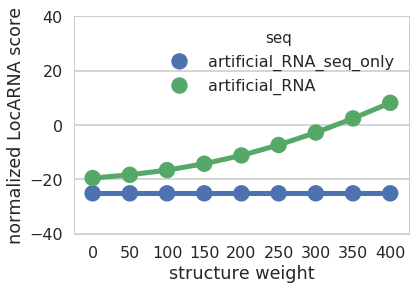

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
sns.set_context("poster")

fig, ax = plt.subplots()

  
sns.pointplot(x="structureWeight", y="norm_score",  hue="seq", data=df_artifical_seq_seqstruc_and_seqonly_sw_0_400, ax=ax)


#ax1.set_title('LocARNA score for full BRALiBase')
ax.set_xlabel('structure weight')
ax.set_ylabel('normalized LocARNA score')
ax.set_ylim([-40,40])





plot_dir_fist_plot = '/home/muellert/Dokumente/locarna_parameteropt/plots/20180906_alignment_score_random_seq/'

fig.savefig(plot_dir_fist_plot + 'poster_lineplot_global_normScore_vs_SW_locarnaV2_0RC6_artifical_dataset.pdf', format='pdf', bbox_inches='tight')

Text(0,0.5,'normalized LocARNA score')

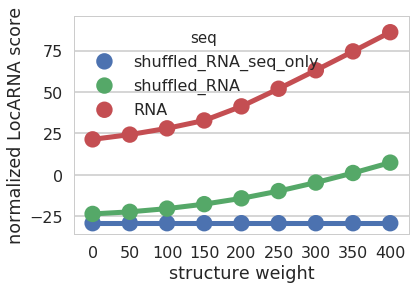

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
sns.set_context("poster")

fig, ax = plt.subplots()

  
sns.pointplot(x="structureWeight", y="norm_score",  hue="seq", data=df_shuffled_and_unshuffled_seq_only_bralibase_sw0_400, ax=ax)


#ax1.set_title('LocARNA score for full BRALiBase')
ax.set_xlabel('structure weight')
ax.set_ylabel('normalized LocARNA score')
#ax.set_ylim([-40,40])




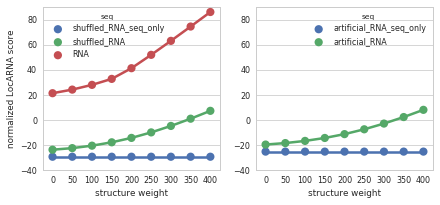

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
sns.set_context("paper")

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(7,3))

  
sns.pointplot(x="structureWeight", y="norm_score",  hue="seq", data=df_shuffled_and_unshuffled_seq_only_bralibase_sw0_400, ax=ax1)


#ax1.set_title('LocARNA score for full BRALiBase')
ax1.set_xlabel('structure weight')
ax1.set_ylabel('normalized LocARNA score')
ax1.set_ylim([-40,90])

sns.pointplot(x="structureWeight", y="norm_score",  hue="seq", data=df_artifical_seq_seqstruc_and_seqonly_sw_0_400, ax=ax2)



#ax2.set_title('LocARNA score for artifical dataset')
ax2.set_xlabel('structure weight')
ax2.set_ylabel('')
ax2.set_ylim([-40,90])

plot_dir_fist_plot = '/home/muellert/Dokumente/locarna_parameteropt/plots/20180906_alignment_score_random_seq/'

fig.savefig(plot_dir_fist_plot + 'lineplot_global_normScore_vs_SW_locarnaV2_0RC6_combine_FULLBralibase_artifical_dataset_SW0_400.pdf', format='pdf', bbox_inches='tight',)
fig.savefig(plot_dir_fist_plot + 'lineplot_global_normScore_vs_SW_locarnaV2_0RC6_combine_FULLBralibase_artifical_dataset_SW0_400.svg', format='svg', bbox_inches='tight',)